In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor,\
                             GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
plt.style.use("ggplot")
pd.set_option('display.max_columns', None)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.model_selection import cross_val_score
import joblib

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class input_outlier(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        a=False
        if a:
            self.feature_names_in = X.columns
        else:
            self.feature_names_in = [str(i) for i in range(X.shape[1])]
            
        self.upper_limit = np.percentile(X, 99)
        self.lower_limit = np.percentile(X, 1)
        
        #--> for pandas
        #self.upper_limit = X.quantile(0.99) 
        #self.lower_limit = X.quantile(0.01)
        
        return self
    
    def transform(self, X, y=None):
        fixed_X = np.where(X>self.upper_limit, self.upper_limit, np.where(X<self.lower_limit, self.lower_limit, X))
        return fixed_X
    
    def get_feature_names_out(self, names=None):
        return self.feature_names_in

In [3]:
cleaning_reloaded = joblib.load("trained_models/cleaning.plk")
stack1_reloaded = joblib.load("trained_models/Stack1.plk")
stack2_reloaded = joblib.load("trained_models/Stack2.plk")
random_forest_reloaded = joblib.load("trained_models/RandomForest.plk")
svm_reloaded = joblib.load("trained_models/SVM.plk")
AdaBoost_reloaded = joblib.load("trained_models/AdaBoost.plk")
grbt_boost_reloaded = joblib.load("trained_models/GradientBoost.plk")
voting_reloaded = joblib.load("trained_models/VotingReg.plk")

In [4]:
data = pd.read_csv("LCWQ_Continuous_FPSites.csv")
sub_data = data.iloc[:5000, :]

# Renaming all columns
sub_data = sub_data.rename(columns= {
    'Site':"site",
    'Site Name':"site_name",
    'Date':"date",
    'Battery (V)':"battery",
    'Conductivity 25C continuous (uS/cm)':"conductivity",
    'Oxygen dissolved continuous (%satn)':"oxygen",
    'pH continuous':"ph",
    'Temperature water continuous (C)':"temp",
     'Water level continuous (mm)':"water_level"
})

# Feature Engineering
sub_data["conductivity/battery"] = sub_data["conductivity"] / sub_data["battery"]
sub_data["water/temp"] = sub_data["water_level"] * sub_data["temp"]
sub_data["conductivity_battery"] = sub_data["conductivity"] * sub_data["battery"]
sub_data["ph_conductivity"] = sub_data["conductivity"] * sub_data["ph"]
sub_data["water_conductivity"] = sub_data["conductivity"] * sub_data["water_level"]

# Selecting only useful features
sub_data_useful = sub_data[['oxygen', 'ph', 'ph_conductivity', 
            'conductivity_battery', 'conductivity', 
            'battery', 'conductivity/battery', 
            'water_conductivity', "water/temp"]].copy()

sub_data_X_clean, sub_data_y = cleaning_reloaded.transform(sub_data_useful.iloc[:,1:].copy()),\
                                sub_data_useful["oxygen"].copy()

In [5]:
pred_rf = random_forest_reloaded.predict(sub_data_X_clean)
pred_svm = svm_reloaded.predict(sub_data_X_clean)
pred_ada = AdaBoost_reloaded.predict(sub_data_X_clean)
pred_grbt = grbt_boost_reloaded.predict(sub_data_X_clean)
pred_voting = voting_reloaded.predict(sub_data_X_clean)
pred_stack_1 = stack1_reloaded.predict(sub_data_X_clean)
pred_stack_2 = stack2_reloaded.predict(sub_data_X_clean)

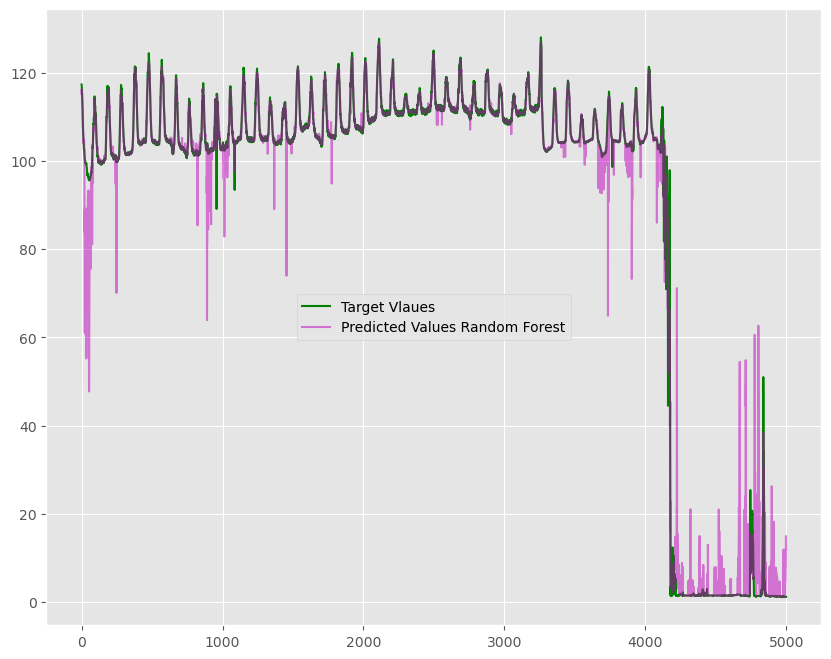

In [19]:
plt.figure(figsize=(10,8))
plt.plot(sub_data_y, "g-", label="Target Vlaues")
plt.plot(pred_rf, "m-", label="Predicted Values Random Forest", alpha=0.5)
plt.legend(loc="center")
plt.savefig("Random Forest", pad_inches=0, dpi=100, transparent=True, bbox_inches="tight")

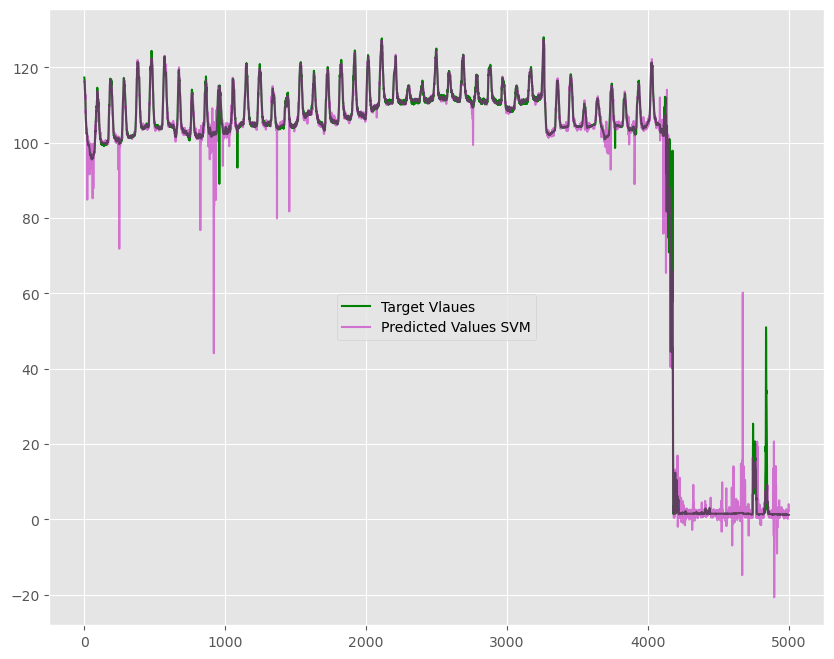

In [20]:
plt.figure(figsize=(10,8))
plt.plot(sub_data_y, "g-", label="Target Vlaues")
plt.plot(pred_svm, "m-", label="Predicted Values SVM", alpha=0.5)
plt.legend(loc="center")
plt.savefig("SVM", pad_inches=0, dpi=100, transparent=True, bbox_inches="tight")

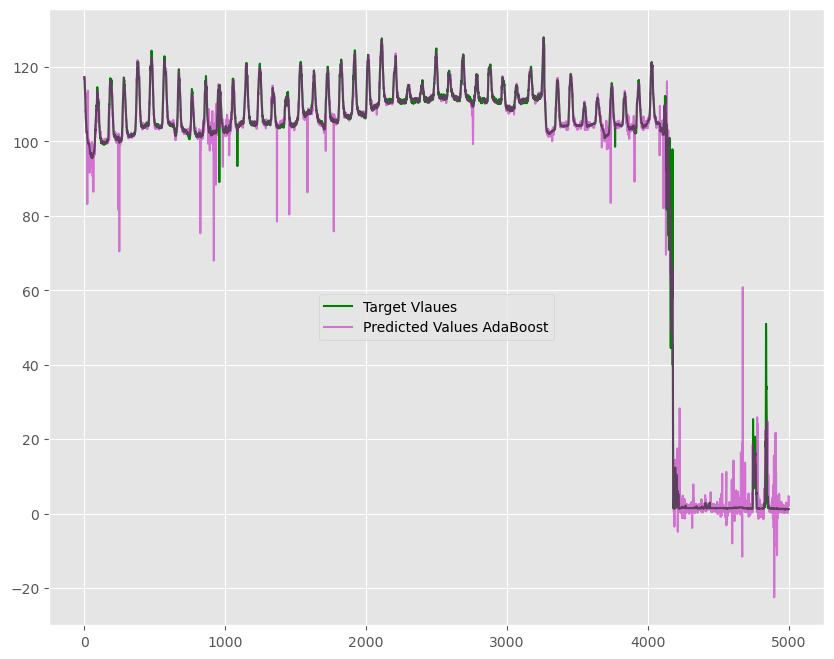

In [21]:
plt.figure(figsize=(10,8))
plt.plot(sub_data_y, "g-", label="Target Vlaues")
plt.plot(pred_ada, "m-", label="Predicted Values AdaBoost", alpha=0.5)
plt.legend(loc="center")
plt.savefig("AdaBoost", pad_inches=0, dpi=100, transparent=True, bbox_inches="tight")

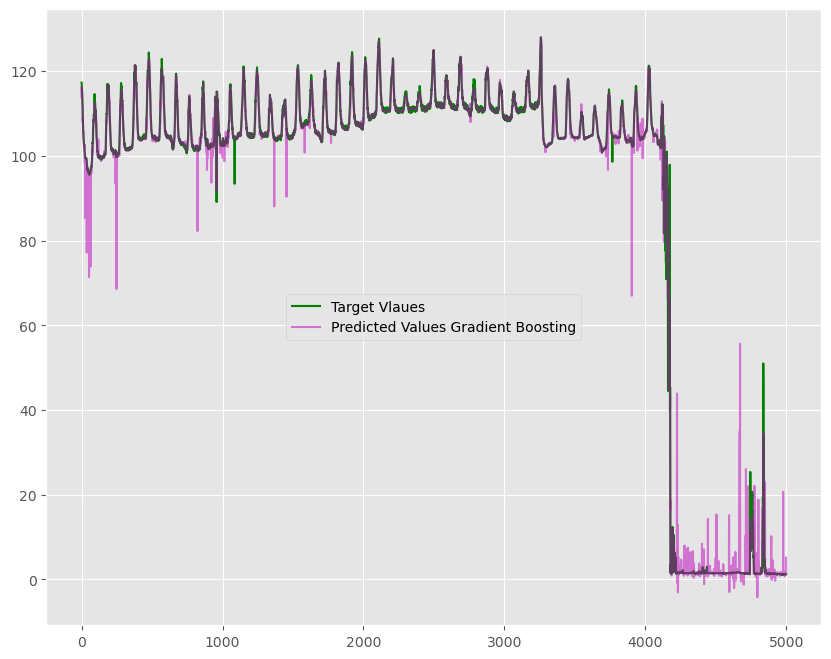

In [22]:
plt.figure(figsize=(10,8))
plt.plot(sub_data_y, "g-", label="Target Vlaues")
plt.plot(pred_grbt, "m-", label="Predicted Values Gradient Boosting", alpha=0.5)
plt.legend(loc="center")
plt.savefig("Gradient Boosting", pad_inches=0, dpi=100, transparent=True, bbox_inches="tight")

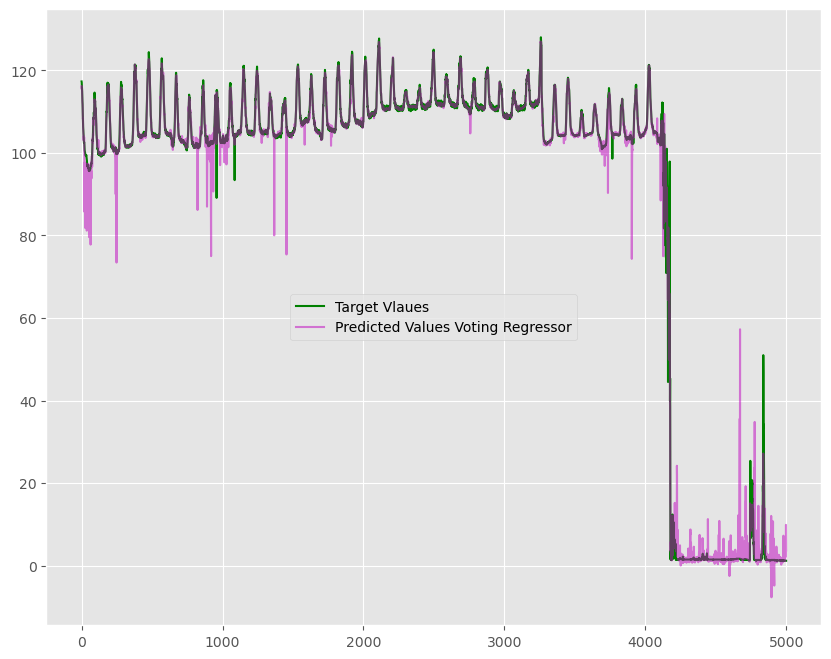

In [23]:
plt.figure(figsize=(10,8))
plt.plot(sub_data_y, "g-", label="Target Vlaues")
plt.plot(pred_voting, "m-", label="Predicted Values Voting Regressor", alpha=0.5)
plt.legend(loc="center")
plt.savefig("Voting Regressor", pad_inches=0, dpi=100, transparent=True, bbox_inches="tight")

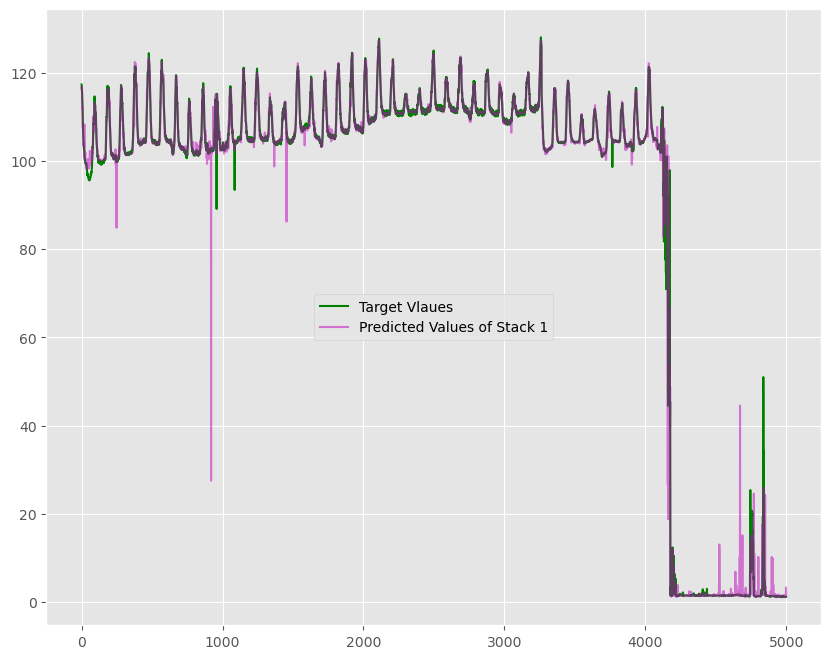

In [11]:
plt.figure(figsize=(10,8))
plt.plot(sub_data_y, "g-", label="Target Vlaues")
plt.plot(pred_stack_1, "m-", label="Predicted Values of Stack 1", alpha=0.5)
plt.legend(loc="center")
plt.show()

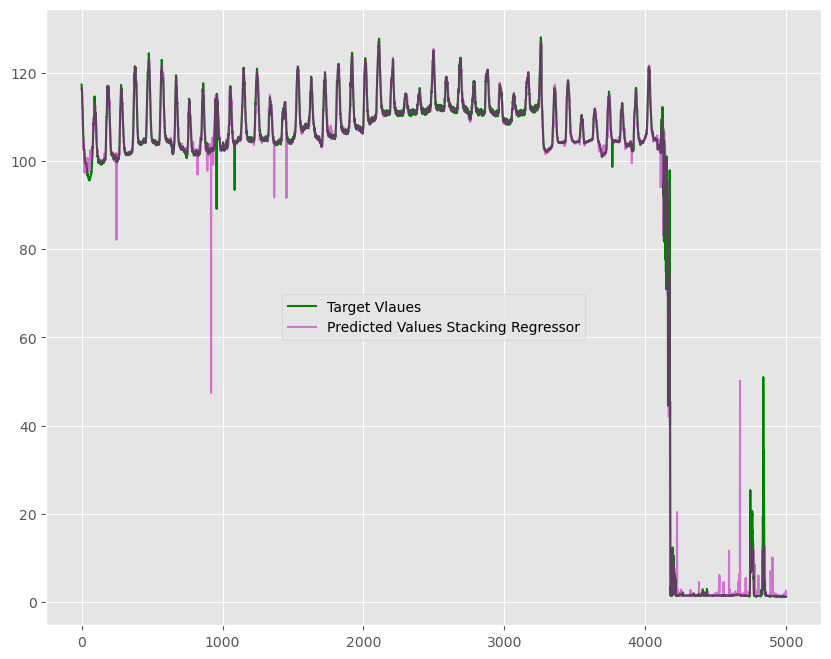

In [24]:
plt.figure(figsize=(10,8))
plt.plot(sub_data_y, "g-", label="Target Vlaues")
plt.plot(pred_stack_2, "m-", label="Predicted Values Stacking Regressor", alpha=0.5)
plt.legend(loc="center")
plt.savefig("Stacking Regressor", pad_inches=0, dpi=100, transparent=True, bbox_inches="tight")

In [13]:
def all_scores(a, b, c, d, e, f):
    all_scores = []
    for i in [a, b, c, d, e, f]:
        score = mean_squared_error(sub_data_y, i, squared=False)
        all_scores.append(score)
    columns = ["Random_Forest", "SVM", "AdaBoost", "Voting_Regressor", "Gradient_Boosting", "Sacking_Regressor"]
    return pd.DataFrame(np.array(all_scores).reshape(1,-1), columns=columns, index=["RMSE"])

In [14]:
model_scores = all_scores(pred_rf, pred_svm, pred_ada, pred_voting, pred_grbt, pred_stack_2)

In [15]:
model_scores

,Random_Forest,SVM,AdaBoost,Voting_Regressor,Gradient_Boosting,Sacking_Regressor
RMSE,4.596676,3.06622,2.907494,2.625783,2.433346,2.415485
